In [20]:
import numpy as np
import cv2
from scipy.ndimage import gaussian_filter
from matplotlib import pyplot as plt
from scipy.ndimage.filters import correlate
Epsilon = 1e-7
DPI = 120
RADIUS = 2
THICKNESS = 2
COLOR = [255,0,0]

C:\Users\danpf\AppData\Local\Temp\ipykernel_17332\184973183.py:5: DeprecationWarning: Please use `correlate` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import correlate


### load image and compute the gradient

In [28]:
# TODO 
input_img = cv2.imread('inputs/I1.jpg', 0) / 255
dy, dx= cv2.Sobel(input_img, 6, 0, 1), cv2.Sobel(input_img, 6, 1, 0)

### Compute structure tensor

In [53]:
# TODO 
Ixx = gaussian_filter(dx**2, sigma=1)
Ixy = gaussian_filter(dx*dy, sigma=1)
Iyy = gaussian_filter(dy**2, sigma=1)

### Compute Shi-Thomasi response and Harris response, please compare them in the end

In [59]:
from numpy import linalg as LA
# TODO
k = 0.05

response_shitomasi = ... # LA.eigvals(np.array([[Ixx, Ixy**2], [Ixy, Iyy]][0,0,:,:]))  # not working
response_harris = (Ixx * Iyy - Ixy**2) - k*(Ixx + Iyy)**2

### Visualise the response map

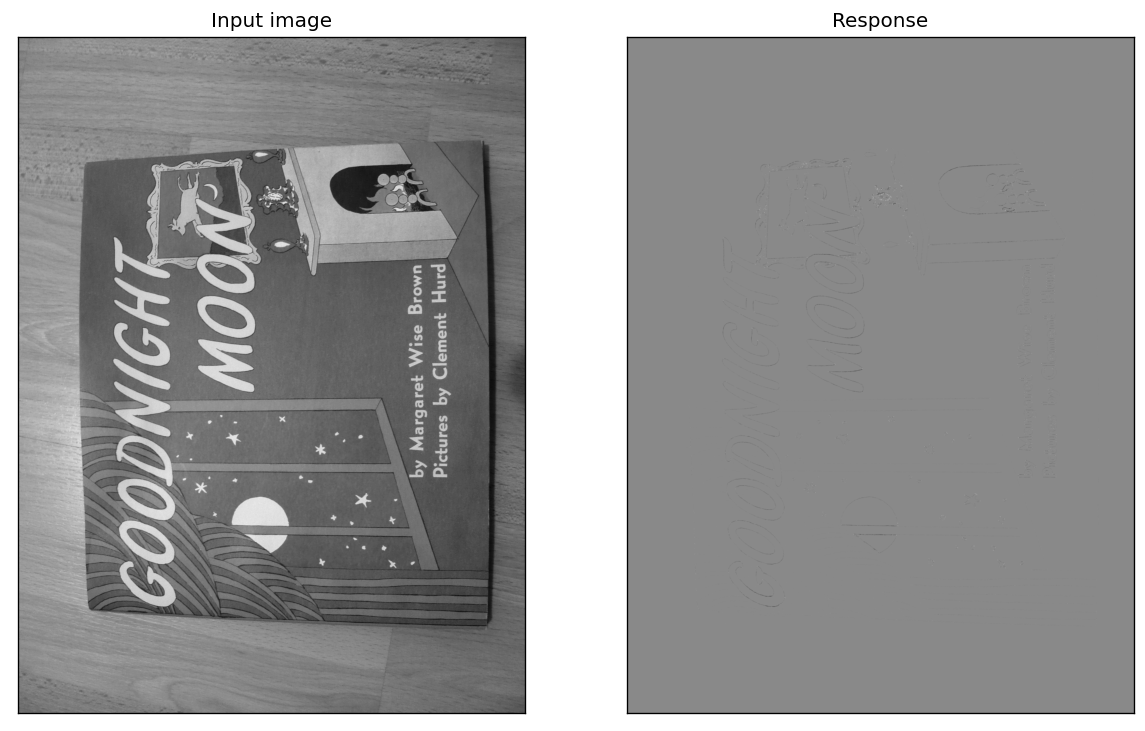

In [55]:
# choose either Shi-Tomasi or Harris response
# TODO 
response = response_harris

plt.figure(figsize=(12, 12),dpi=DPI)
plt.subplot(121)
plt.xticks([]), plt.yticks([])
plt.imshow(input_img, cmap = 'gray')
plt.title('Input image')

plt.subplot(122)
plt.xticks([]), plt.yticks([])
plt.imshow(response, cmap=plt.cm.gray)
plt.title('Response')
plt.show()

### Plot the histogram of responses

(array([7.501416e+06, 3.120000e+03, 8.540000e+02, 2.630000e+02,
        9.700000e+01, 3.800000e+01, 2.100000e+01, 6.000000e+00,
        4.000000e+00, 2.000000e+00]),
 array([1.01119244e-14, 4.91783300e-03, 9.83566601e-03, 1.47534990e-02,
        1.96713320e-02, 2.45891650e-02, 2.95069980e-02, 3.44248310e-02,
        3.93426640e-02, 4.42604970e-02, 4.91783300e-02]),
 <BarContainer object of 10 artists>)

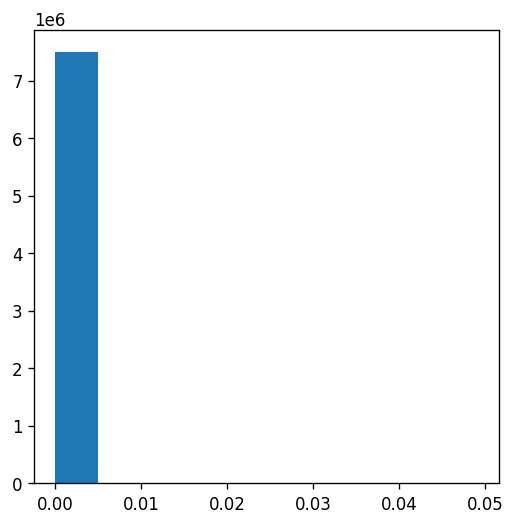

In [56]:
plt.figure(figsize=(5,5), dpi=DPI)
plt.hist(response.flatten()[response.flatten()>0])

### Threshold the corners and visualise it

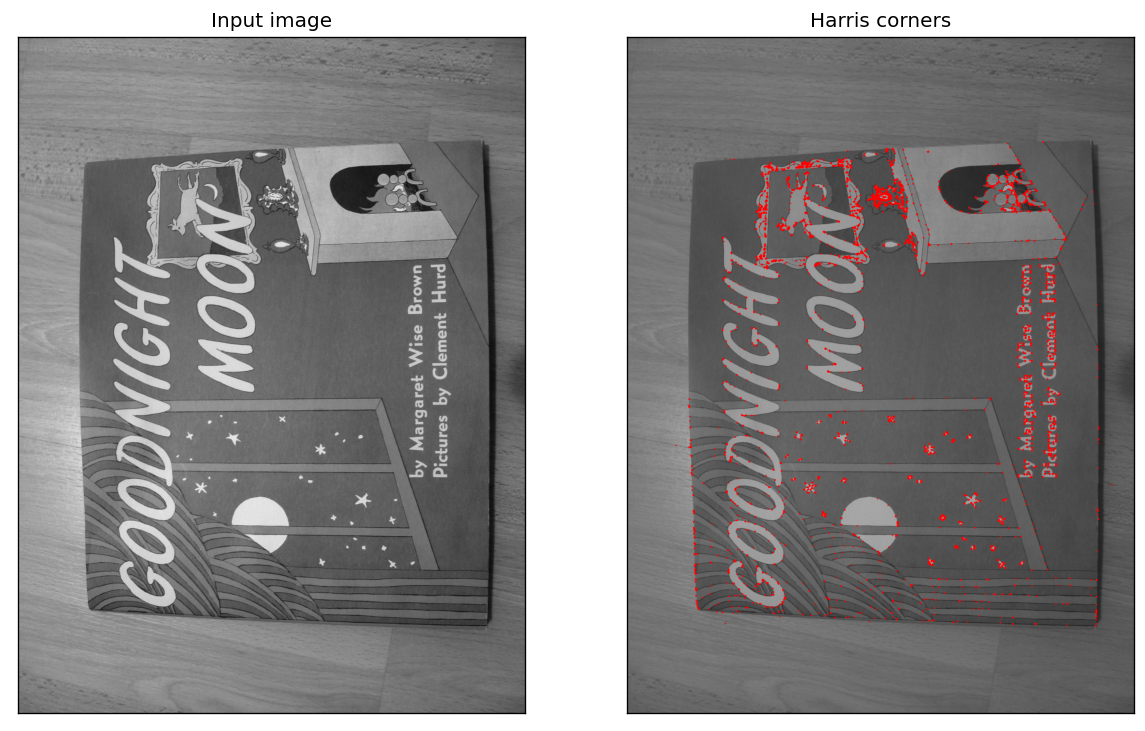

In [61]:
# TODO 
threshold = 0.001

corners =  cv2.cvtColor((input_img.copy() * 255).astype(np.uint8), cv2.COLOR_GRAY2RGB)
mask = response>threshold

x, y = np.where(mask)
for idx in range(len(x)):
    cv2.circle(corners, (y[idx],x[idx]), RADIUS, COLOR, THICKNESS)

plt.figure(figsize=(12, 12),dpi=DPI)
plt.subplot(121)
plt.xticks([]), plt.yticks([])
plt.imshow((input_img * 255).astype(np.uint8), cmap = 'gray')
plt.title('Input image')

plt.subplot(122)
plt.xticks([]), plt.yticks([])
plt.imshow(corners)
plt.title('Harris corners')
plt.show()

### Apply NMS

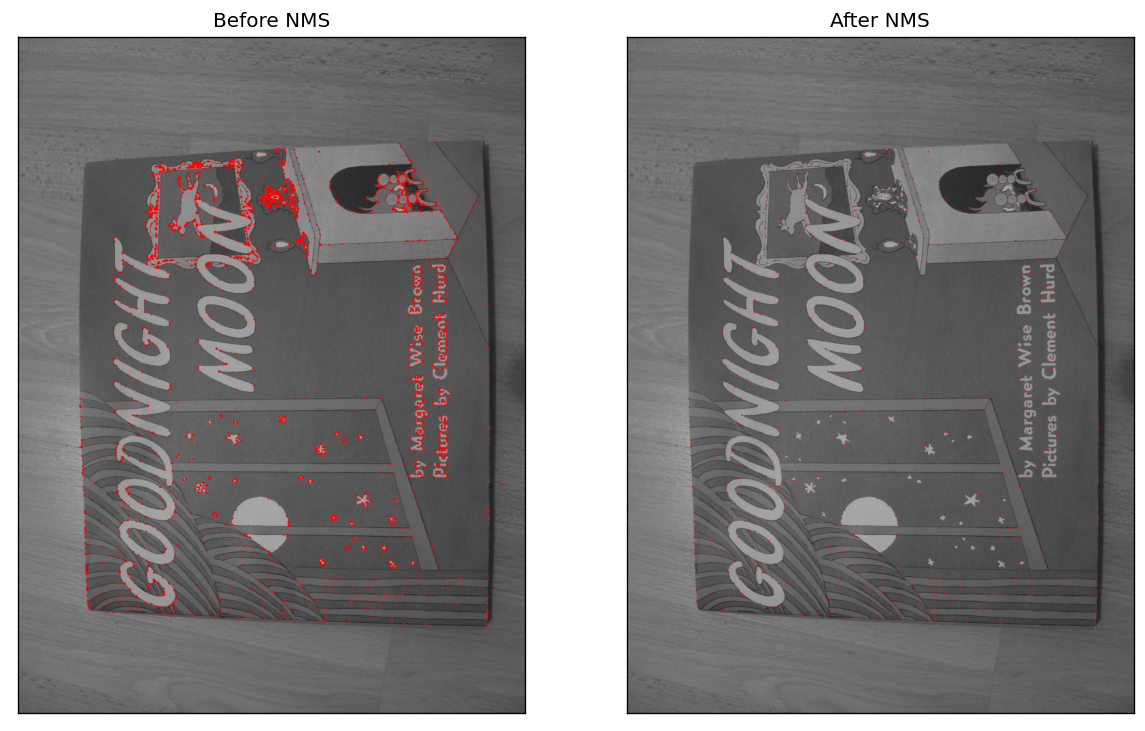

In [58]:
from scipy.ndimage import maximum_filter
# TODO
maximas = maximum_filter(response, size=50) == response
mask = np.bitwise_and(maximas, response>threshold)

corners_filter =  cv2.cvtColor((input_img.copy() * 255).astype(np.uint8), cv2.COLOR_GRAY2RGB)
x, y = np.where(mask)
for idx in range(len(x)):
    cv2.circle(corners_filter, (y[idx],x[idx]), RADIUS, COLOR, THICKNESS)

plt.figure(figsize=(12, 12),dpi=DPI)
plt.subplot(121)
plt.xticks([]), plt.yticks([])
plt.imshow(corners)
plt.title('Before NMS')

plt.subplot(122)
plt.xticks([]), plt.yticks([])
plt.imshow(corners_filter)
plt.title('After NMS')
plt.show()